In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import os
import cv2
import pickle
import matplotlib.pyplot as plt
from scipy.spatial import distance

data=[]


In [2]:
datab=[]
directory='../input/blood-cells/dataset-master/dataset-master/JPEGImages'
imagesize=(100,100)
counter=0
x=0
for img in os.listdir(directory):
    x+=1
    img_path=os.path.join(directory,img)
    image=cv2.imread(img_path,0)
    image=cv2.resize(image,imagesize)
    datab.append([image,'B'])
directory='../input/microsoft-catsvsdogs-dataset/PetImages/Cat'
for img in os.listdir(directory):
    x+=1
    img_path=os.path.join(directory,img)
    image=cv2.imread(img_path,0)
    try:
        image=cv2.resize(image,imagesize)
        datab.append([image,'C'])
    except:
        pass
    if counter==300:
        break
    
directory='../input/microsoft-catsvsdogs-dataset/PetImages/Dog'
imagesize=(100,100)
counter=0
for img in os.listdir(directory):
    x+=1
    img_path=os.path.join(directory,img)
    image=cv2.imread(img_path,0)
    try:
        image=cv2.resize(image,imagesize)
        datab.append([image,'D'])
    except:
        pass
    counter+=1
    if counter==300:
        break

In [3]:
def bonus_part(rescls,inpimage):
    imagesize=(100,100)
    inpimage=cv2.resize(inpimage,imagesize)
    counter=0
    dstlist=[]
    for img,label in datab:
        if label==rescls:
            dst=distance.euclidean(img.flatten(),inpimage.flatten())
            dstlist.append(dst)
    dstarr=np.array(dstlist)
    indx=[]
    for i in range(0,4):
        minim=np.min(dstarr)
        for y in range(len(dstarr)):
            if dstarr[y]==minim:
                dstarr[y]=100000000
                indx.append(y)
    index=0
    for image,labels in datab:
        if labels==rescls:
            if index in indx:
                plt.imshow(image)
                plt.show()
            index+=1
    return 
        
    

In [4]:
#knn
data=[]
directory='../input/blood-cells/dataset-master/dataset-master/JPEGImages'
imagesize=(100,100)
counter=0
for img in os.listdir(directory):
    img_path=os.path.join(directory,img)
    image=cv2.imread(img_path,0)
    image=cv2.resize(image,imagesize)
    data.append([image,'B'])
    if counter ==100:
        break
directory='../input/microsoft-catsvsdogs-dataset/PetImages/Cat'
counter=0
for img in os.listdir(directory):
    img_path=os.path.join(directory,img)
    image=cv2.imread(img_path,0)
    try:
        image=cv2.resize(image,imagesize)
        data.append([image,'C'])
    except:
        pass
    counter+=1
    if counter==150:
        break
directory='../input/microsoft-catsvsdogs-dataset/PetImages/Dog'
imagesize=(100,100)
counter=0
for img in os.listdir(directory):
    img_path=os.path.join(directory,img)
    image=cv2.imread(img_path,0)
    try:
        image=cv2.resize(image,imagesize)
        data.append([image,'D'])
    except:
        pass
    counter+1
    if counter==100:
        break

In [5]:
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)
x=np.array(x)
y=np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.10)
nsamples, nx, ny = X_train.shape
x = X_train.reshape((nsamples,nx*ny))



In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(x,y_train)

KNeighborsClassifier(n_neighbors=3)

In [7]:
def make_prediction(prd):
    c=0
    d=0
    b=0
    for x in prd:
        if x[0]=='C':
            c+=1
        elif x[0]=='D':
            d+=1
        else:
            b+=1
    if c>b and c>d:
        return 'C'
    elif c<b and d<b:
        return 'B'
    elif d>c and d>b:
        return 'D'
    else:
        return prd[2]
        
    return

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0).fit(x,y_train)

prediction is D
nearest four images are


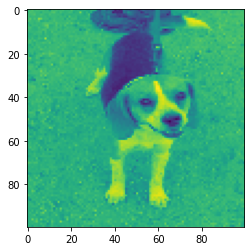

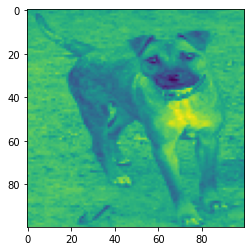

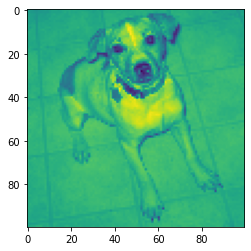

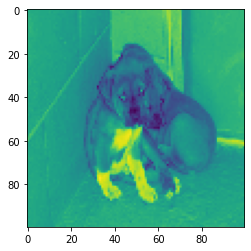

In [9]:
#main
svm=pickle.load(open('../input/classifiers/SVM-Project.pkl','rb'))
logistic=pickle.load(open('../input/inputs/clf.pkl','rb'))
svm2=pickle.load(open('../input/inputs/svm.pkl','rb'))
pathe='../input/microsoft-catsvsdogs-dataset/PetImages/Dog/1000.jpg'
image=cv2.resize(cv2.imread(pathe,0),(100,100))
p1=svm.predict([image.flatten()])
p2=logistic.predict([image.flatten()])
p3=svm2.predict([image.flatten()])
p4=knn.predict([image.flatten()])
p5=dtree.predict([image.flatten()])
predictions=[p1,p2,p3,p4,p5]
result=make_prediction(predictions)
print('prediction is '+result)
print('nearest four images are')
bonus_part(result,image)

        


# ROC And Confusion Matrix For logistic Regression Model

In [10]:
 nsamples, nx, ny = X_test.shape
x_test = X_test.reshape((nsamples,nx*ny))
y_prob = logistic.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


One-vs-One ROC AUC scores:
0.919780 (macro),
0.882449 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.896970 (macro),
0.832298 (weighted by prevalence)


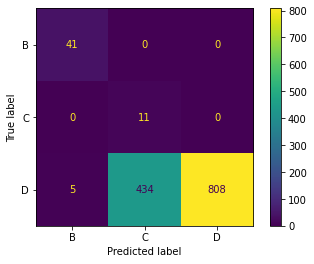

In [11]:
plot_confusion_matrix(logistic, x_test,  y_test) 


# Roc and Confusion Matrix for Decision Tree Model

In [12]:
y_prob = dtree.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))


One-vs-One ROC AUC scores:
0.700701 (macro),
0.700006 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.738480 (macro),
0.814038 (weighted by prevalence)


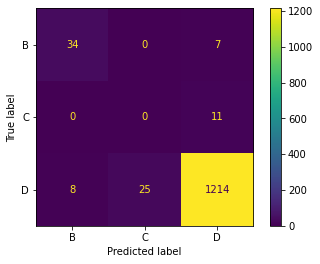

In [13]:
plot_confusion_matrix(dtree, x_test,  y_test) 

# Roc and Confusion Matrix for K nearest Neighbor

In [14]:
y_prob = knn.predict_proba(x_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.750115 (macro),
0.752957 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.792719 (macro),
0.892660 (weighted by prevalence)


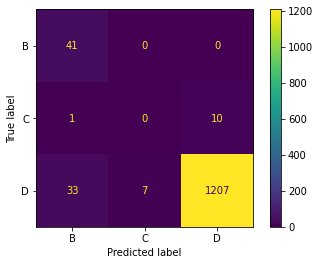

In [15]:
plot_confusion_matrix(knn, x_test,  y_test) 

# Confusion Matrix for Support Vector Machine

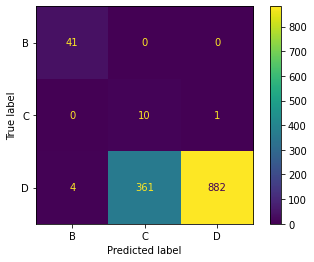

In [16]:
plot_confusion_matrix(svm2, x_test,  y_test) 